<a href="https://colab.research.google.com/github/nishantkj911/deep-learning-models/blob/master/mnist_experimentation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install --upgrade tensorflow grpcio google-auth google-colab

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.0.0)
Requirement already up-to-date: grpcio in /usr/local/lib/python3.6/dist-packages (1.26.0)
Requirement already up-to-date: google-auth in /usr/local/lib/python3.6/dist-packages (1.10.0)
Requirement already up-to-date: google-colab in /usr/local/lib/python3.6/dist-packages (1.0.0)


In [37]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [38]:
!pip install --upgrade tensorflow-datasets

Requirement already up-to-date: tensorflow-datasets in /usr/local/lib/python3.6/dist-packages (1.3.2)


In [39]:
import tensorflow as tf
import tensorflow.keras as k
# import tensorflow-datasets as tfds required for downloading Tensorflow Datasets. Now currently using Keras datasets
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os
from tensorboard.plugins.hparams import api as hp

print(tf.version.VERSION)

2.0.0


In [0]:
# load the dataset into test and training sets.
dataset = k.datasets.mnist.load_data(path='mnist.npz')
(x_train, y_train), (x_test, y_test) = dataset

Each element of x_test and x_train are 28 X 28 images (2-D int arrays) each which have values from 0-255.

Each element of y_train and y_test is a value from 0-9 representing the classes.

x_test and y_test are of lengths, 10000
y_train and y_test are of lengths, 60000

Therefore, training set is 60000 length and test set is 10000


In [41]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [0]:
# a function to see a particular dataset
def show_data(i):
    plt.figure()
    plt.imshow(x_test[i])
    plt.colorbar()
    plt.grid(False)
    plt.show()

    print(y_test[i])

In [0]:
def show_random_data():
    random_sample = np.random.randint(0, len(x_test))
    show_data(random_sample)

def tensorboard_visualization_of_data():
    image_log_dir = "logs/model_logs/mnist_basic/"
    with tf.summary.create_file_writer(image_log_dir).as_default() as fw:
        tf.summary.image("First 25 of test data", x_test.reshape(-1, 28, 28, 1), step=0, max_outputs=25)

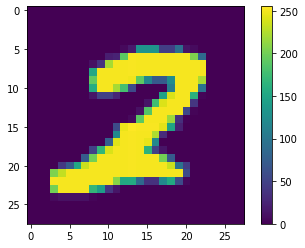

2


In [44]:
show_random_data()
tensorboard_visualization_of_data()

In [45]:
# flattening the test and training set
x_test_reshaped = x_test.reshape([-1, 28 * 28])
x_train_reshaped = x_train.reshape([-1, 28 * 28])
print(x_test.shape, x_train.shape)

(10000, 28, 28) (60000, 28, 28)


# First Iteration of model design

##  Test Environment

*   Using only one layer. Practically it is logistic regression.
*   Using softmax output of 10 layers.
*   Using RMSProp optimizer
*   Epochs = 100



In [0]:
def create_model():
    """activation_hp = hp.HParam("Activation", hp.Discrete(['sigmoid', 'relu', 'tanh']))
    
    with tf.summary.create_file_writer('logs/model_logs/mnist_basic').as_default() as fw:
        hp.hparams_config(hparams=[activation_hp], 
                          metrics=[hp.Metric('accuracy', display_name='Accuracy'), 
                                                    hp.Metric('loss', display_name='Loss')])"""

    model = k.Sequential(
        k.layers.Dense(10, activation='relu', name='output-fc', input_shape=(28*28,))
    )

    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['categorical_accuracy'])
    
    return model

In [0]:
model = create_model()

In [0]:
checkpoint_filepath = 'saves/model-saves/mnist_basic.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_filepath)

In [0]:
# Run the model
my_log_dir = "logs/model_logs/mnist_basic/" + datetime.datetime.now().strftime('%Y-%m-%d  %H:%M:%S')
tensorboard_callback = k.callbacks.TensorBoard(log_dir=my_log_dir, histogram_freq=1)
checkpoint_callback = k.callbacks.ModelCheckpoint(checkpoint_filepath, verbose=1)

history = model.fit(x_train_reshaped, y_train, 
                    verbose=1, epochs=100, 
                    callbacks=[tensorboard_callback, checkpoint_callback], 
                    validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
53600/54000 [============================>.] - ETA: 0s - loss: 2.2034 - categorical_accuracy: 0.9045
Epoch 00001: saving model to saves/model-saves/mnist_basic.ckpt
INFO:tensorflow:Assets written to: saves/model-saves/mnist_basic.ckpt/assets
54000/54000 [==============================] - 3s 61us/sample - loss: 2.2038 - categorical_accuracy: 0.9046 - val_loss: 2.1909 - val_categorical_accuracy: 0.9048
Epoch 2/100
53120/54000 [============================>.] - ETA: 0s - loss: 2.2030 - categorical_accuracy: 0.9045
Epoch 00002: saving model to saves/model-saves/mnist_basic.ckpt
INFO:tensorflow:Assets written to: saves/model-saves/mnist_basic.ckpt/assets
54000/54000 [==============================] - 3s 61us/sample - loss: 2.2038 - categorical_accuracy: 0.9046 - val_loss: 2.1909 - val_categorical_accuracy: 0.9048
Epoch 3/100
53536/54000 [============================>.] - ETA: 0s - loss: 2.2032 - categorical_accuracy: 0.9047
Epoch 

In [0]:
%tensorboard --logdir "logs/model_logs/mnist_basic/"